## Data Science Nigeria Staff Promotion Algorithm
Author:🧕🏿 Hasanat Owoseni\
Date : 25th September, 2019

### STEPS 
1. Import Libraies and Dataset
2. Merge the data set together (train and test)
3. change the way the column names are formatted: (uppercases to samller), no special char except underscore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

### The Dataset 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [5]:
df_test.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

### Dataframe merging 
The test data frame doesn't include the Promoted_or_not column. \
The reason I'm merging it is so I can easily clean the test and train dataframe as a dataframe which is faster\ 
rather  than cleaning them individually.\

Hence, I will be adding the missing column `promoted_or_not` column. Populate it with a constant : `15`


In [7]:
 df_test['Promoted_or_Not'] = 15

In [8]:
df = pd.concat([df_train, df_test])

In [9]:
#remove the irregularity in the dataframe's column using string methods
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
df.sample(3)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not
22920,YAK/S/32721,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Agency and others,2,1990,12.5,2013,0,0,43,NASSARAWA,Yes,Single,No,No,3,0
9194,YAK/S/30715,Information and Strategy,"MSc, MBA and PhD",Male,Direct Internal process,2,1983,2.5,2012,0,0,80,OYO,Yes,Married,No,No,2,15
4709,YAK/S/06635,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,2,1979,7.5,2006,0,0,44,OYO,No,Married,No,No,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 16495
Data columns (total 19 columns):
employeeno                             54808 non-null object
division                               54808 non-null object
qualification                          52399 non-null object
gender                                 54808 non-null object
channel_of_recruitment                 54808 non-null object
trainings_attended                     54808 non-null int64
year_of_birth                          54808 non-null int64
last_performance_score                 54808 non-null float64
year_of_recruitment                    54808 non-null int64
targets_met                            54808 non-null int64
previous_award                         54808 non-null int64
training_score_average                 54808 non-null int64
state_of_origin                        54808 non-null object
foreign_schooled                       54808 non-null object
marital_status                         548

In [12]:
print(len(df.marital_status.unique()), ':', df.marital_status.unique())

3 : ['Married' 'Single' 'Not_Sure']


In [13]:
print(len(df.division.unique()), ':', df.division.unique())

9 : ['Commercial Sales and Marketing' 'Customer Support and Field Operations'
 'Information and Strategy' 'Information Technology and Solution Support'
 'Sourcing and Purchasing' 'Business Finance Operations'
 'People/HR Management' 'Research and Innovation'
 'Regulatory and Legal services']


## Feature Engineering
I'll like to add a new coliumn (age).\
I think its easier to relate to than year of birth

In [14]:
def  get_age(age):
    return(int(2019)-int(age))

df['age'] = df['year_of_birth'].map(lambda x: get_age(x))

## Dealing with Missing Values
All the columns (features) except qualification have complete values\
Let's view the rows with missing values
and replace it with 'nullet'

In [15]:
df['qualification'] = df['qualification'].replace(np.NaN, 'nullet')

In [16]:
print(len(df.qualification.unique()), ':', df.qualification.unique())

4 : ['MSc, MBA and PhD' 'First Degree or HND' 'nullet'
 'Non-University Education']


In [17]:
df.sample(10)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
12403,YAK/S/17627,Commercial Sales and Marketing,nullet,Female,Agency and others,2,1993,12.5,2017,1,0,46,OSUN,Yes,Single,No,No,1,0,26
11270,YAK/S/15997,Sourcing and Purchasing,First Degree or HND,Female,Direct Internal process,3,1993,7.5,2016,0,0,61,OSUN,Yes,Single,No,Yes,0,0,26
15119,YAK/S/21569,Business Finance Operations,First Degree or HND,Female,Direct Internal process,2,1989,12.5,2013,1,0,50,LAGOS,Yes,Married,No,No,0,0,30
17647,YAK/S/25177,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Agency and others,2,1961,2.5,2011,1,0,43,GOMBE,Yes,Married,No,No,1,0,58
3232,YAK/S/04528,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1968,10.0,2005,0,0,40,OGUN,Yes,Married,No,No,1,0,51
12795,YAK/S/42701,Sourcing and Purchasing,First Degree or HND,Male,Direct Internal process,2,1980,2.5,2017,0,0,65,KANO,Yes,Married,No,No,1,15,39
952,YAK/S/03361,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1990,2.5,2015,0,0,36,DELTA,Yes,Married,No,No,1,15,29
35631,YAK/S/50907,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,3,1985,7.5,2012,1,0,54,ADAMAWA,Yes,Married,No,No,1,0,34
13293,YAK/S/18921,Sourcing and Purchasing,First Degree or HND,Female,Agency and others,2,1973,7.5,2000,0,0,58,SOKOTO,Yes,Married,No,No,1,0,46
6069,YAK/S/08589,Customer Support and Field Operations,"MSc, MBA and PhD",Male,Agency and others,2,1973,7.5,1999,1,0,51,ANAMBRA,Yes,Single,No,No,1,1,46


### Check what qualifications occupy what Division

In [18]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1895,499,106,36
Commercial Sales and Marketing,11099,4166,0,1575
Customer Support and Field Operations,7781,3165,176,226
Information Technology and Solution Support,4642,2196,201,99
Information and Strategy,3978,1037,0,337
People/HR Management,1525,733,128,32
Regulatory and Legal services,814,156,65,4
Research and Innovation,542,429,0,28
Sourcing and Purchasing,4393,2544,129,72


## plotting an Multiple bar to visualize this 

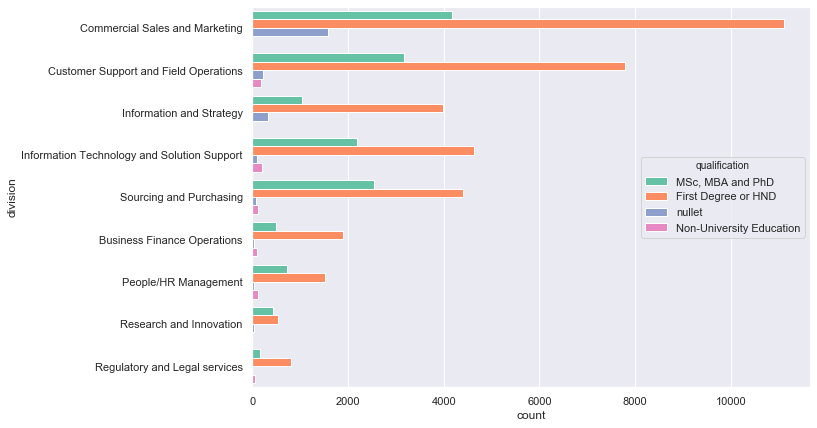

In [19]:

sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale=1)
ax = sns.countplot(y="division", hue = "qualification", data=df, saturation=1, dodge=True, palette= 'Set2')

**Non-University Education** has no slot in the Commercial Sales and Marketing, \
Information and Strategy and Research and Innovation

## Age to filter
blox plot of the Age of people

In [20]:
msc = df.where(df.qualification =='MSc, MBA and PhD').dropna(how = 'all')

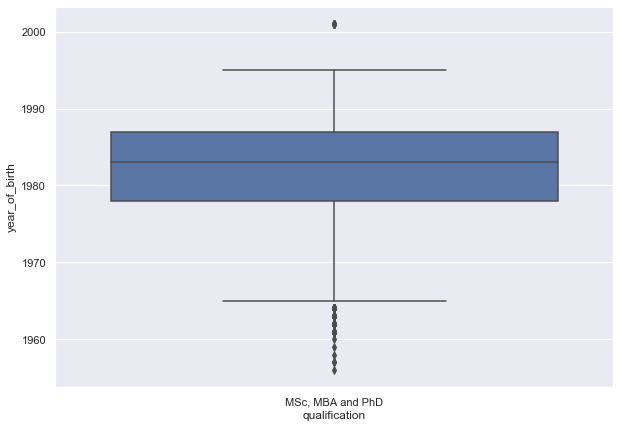

In [21]:
ax = sns.boxplot(x="qualification", y="year_of_birth", data=msc)

In [22]:
#the mean age recruiment

print(msc["year_of_birth"].mean())
print(msc['year_of_birth'].mode())
print(msc['year_of_birth'].median())

msc['year_of_birth'].describe()

1981.6458291457286
0    1987.0
dtype: float64
1983.0


count    14925.000000
mean      1981.645829
std          7.075548
min       1956.000000
25%       1978.000000
50%       1983.000000
75%       1987.000000
max       2001.000000
Name: year_of_birth, dtype: float64

In [23]:
msc["year_of_birth"].unique()

array([1986., 1988., 1989., 1982., 1979., 1971., 1990., 1980., 1983.,
       1975., 1974., 1957., 1987., 1984., 1981., 1985., 1978., 1977.,
       1991., 1972., 1969., 1976., 1964., 1968., 1995., 1970., 1973.,
       1965., 1993., 1963., 1962., 1961., 1967., 1966., 1992., 1994.,
       1956., 1959., 2001., 1958., 1960.])

In [24]:
len(msc["year_of_birth"].unique())

41

Since, 2001 is the max age, which is an outlier: Anyone older than 2001 does not a have MSC

In [25]:
msc['division'].unique()
len(msc['division'].unique())

9

### Okay, wait! 
### Thank God! Let's work with the count plot above
Starting for the division with the least nullet: \
**Regulatory and Legal services**

In [26]:
pd.crosstab((df['division']=='Regulatory and Legal services'), df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
False,35855,14769,740,2405
True,814,156,65,4


In [27]:
reg = df[df['division']=='Regulatory and Legal services']
reg

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
55,YAK/S/00085,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1992,0.0,2018,0,0,57,ANAMBRA,Yes,Married,No,No,1,1,27
150,YAK/S/00209,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1971,12.5,2013,0,1,50,KADUNA,Yes,Married,No,No,0,0,48
186,YAK/S/00258,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1987,12.5,2015,0,0,56,LAGOS,Yes,Married,No,No,0,0,32
194,YAK/S/00273,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1993,0.0,2018,0,0,54,RIVERS,Yes,Married,No,No,1,0,26
222,YAK/S/00312,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1996,12.5,2017,1,0,51,KANO,Yes,Married,No,No,1,0,23
309,YAK/S/00440,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1990,7.5,2018,1,0,54,OSUN,Yes,Married,No,No,1,0,29
404,YAK/S/00566,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1988,2.5,2013,0,0,58,LAGOS,Yes,Married,No,No,5,0,31
405,YAK/S/00568,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1994,0.0,2018,1,0,51,KATSINA,Yes,Married,No,No,0,0,25
521,YAK/S/00743,Regulatory and Legal services,"MSc, MBA and PhD",Male,Agency and others,2,1963,7.5,2004,1,0,52,ONDO,Yes,Married,No,No,1,0,56
545,YAK/S/00777,Regulatory and Legal services,First Degree or HND,Female,Agency and others,2,1969,7.5,2015,1,1,47,OSUN,Yes,Married,No,No,3,0,50


In [28]:
reg['gender'].value_counts()

Male      890
Female    149
Name: gender, dtype: int64

In [29]:
nullet_reg = reg.where(reg.qualification == 'nullet').dropna(how='all')
nullet_reg

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
7924,YAK/S/11210,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,12.5,2016.0,0.0,0.0,48.0,FCT,Yes,Single,No,No,2,0.0,31.0
17533,YAK/S/25020,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1989.0,7.5,2017.0,1.0,0.0,48.0,ANAMBRA,Yes,Married,No,No,0,0.0,30.0
20539,YAK/S/29315,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1974.0,10.0,2013.0,1.0,0.0,48.0,FCT,Yes,Married,No,No,2,0.0,45.0
32213,YAK/S/45979,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,7.5,2015.0,0.0,0.0,51.0,DELTA,Yes,Married,No,No,3,0.0,31.0


In [30]:
nullet_reg.age

7924     31.0
17533    30.0
20539    45.0
32213    31.0
Name: age, dtype: float64

In [31]:
##Let's check for a trend in people who where in the reg div and where recruited through direct internal process
reg[reg.channel_of_recruitment=='Direct Internal process']

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
150,YAK/S/00209,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1971,12.5,2013,0,1,50,KADUNA,Yes,Married,No,No,0,0,48
186,YAK/S/00258,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1987,12.5,2015,0,0,56,LAGOS,Yes,Married,No,No,0,0,32
638,YAK/S/00900,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1991,0.0,2018,0,0,55,KOGI,Yes,Single,No,No,1,0,28
1117,YAK/S/01538,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1989,2.5,2013,0,0,54,KANO,Yes,Married,No,No,1,0,30
1147,YAK/S/01583,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1972,12.5,2001,0,0,52,LAGOS,Yes,Married,No,Yes,0,0,47
1335,YAK/S/01850,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1991,12.5,2017,0,0,48,KADUNA,Yes,Single,No,No,1,0,28
1543,YAK/S/02139,Regulatory and Legal services,Non-University Education,Male,Direct Internal process,2,1993,10.0,2017,1,0,55,SOKOTO,Yes,Married,No,No,0,0,26
1593,YAK/S/02224,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1981,10.0,2014,0,0,55,RIVERS,Yes,Single,No,No,0,0,38
1832,YAK/S/02558,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1977,12.5,2015,0,0,54,KWARA,Yes,Married,No,No,1,0,42
2007,YAK/S/02799,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1989,7.5,2015,0,0,49,NASSARAWA,Yes,Married,No,No,1,0,30


In [32]:
spec_dir_reg = reg[(reg.last_performance_score <= 12.5) & (reg.channel_of_recruitment == 'Direct Internal process') & (reg.foreign_schooled == 'Yes')]

In [33]:
#ploting a box plot to represent the reg datframe at Direct Internal process recruitment
spec_dir_reg.sample(10)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
10631,YAK/S/15071,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1974,12.5,2005,1,0,51,NIGER,Yes,Married,No,No,0,0,45
3402,YAK/S/04780,Regulatory and Legal services,First Degree or HND,Female,Direct Internal process,2,1993,0.0,2018,0,0,51,OGUN,Yes,Married,No,No,0,0,26
2960,YAK/S/04133,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1991,7.5,2016,0,0,48,LAGOS,Yes,Single,No,No,0,0,28
10772,YAK/S/15270,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1992,0.0,2018,1,0,53,LAGOS,Yes,Married,No,Yes,1,0,27
24393,YAK/S/34808,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1989,0.0,2018,0,0,52,OGUN,Yes,Married,No,No,1,0,30
6676,YAK/S/09451,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1984,7.5,2012,0,0,47,DELTA,Yes,Single,No,No,0,0,35
10773,YAK/S/15271,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1982,12.5,2007,0,0,51,AKWA IBOM,Yes,Married,No,No,1,0,37
12574,YAK/S/17885,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1992,0.0,2018,0,0,49,ENUGU,Yes,Married,No,No,1,0,27
3416,YAK/S/11607,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1986,2.5,2012,0,0,55,KANO,Yes,Married,No,No,1,15,33
21030,YAK/S/30012,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1978,7.5,2011,0,0,53,OGUN,Yes,Single,No,Yes,0,0,41


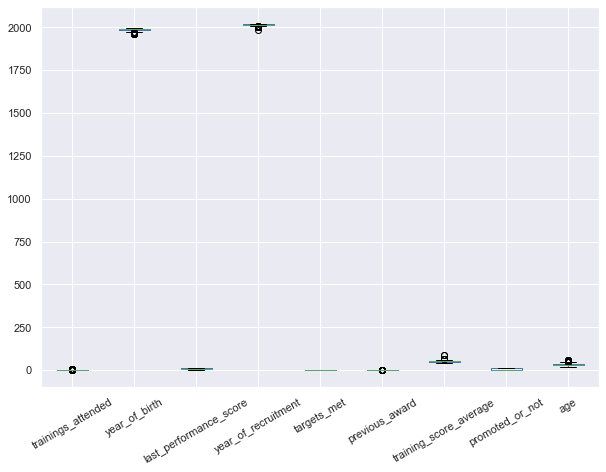

In [34]:
spec_dir_reg.boxplot(rot = 30)

In [35]:
spec_dir_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 150 to 16367
Data columns (total 20 columns):
employeeno                             408 non-null object
division                               408 non-null object
qualification                          408 non-null object
gender                                 408 non-null object
channel_of_recruitment                 408 non-null object
trainings_attended                     408 non-null int64
year_of_birth                          408 non-null int64
last_performance_score                 408 non-null float64
year_of_recruitment                    408 non-null int64
targets_met                            408 non-null int64
previous_award                         408 non-null int64
training_score_average                 408 non-null int64
state_of_origin                        408 non-null object
foreign_schooled                       408 non-null object
marital_status                         408 non-null object
past_discip

In [36]:
pd.crosstab(spec_dir_reg.qualification, spec_dir_reg.promoted_or_not)

promoted_or_not,0,1,15
qualification,,,
First Degree or HND,212,10,93
"MSc, MBA and PhD",45,2,19
Non-University Education,17,2,4
nullet,4,0,0


In [37]:
##i've columned on giving them a qualification of 'First Degree or HND'

In [83]:
((df.division =='Regulatory and Legal services') & (df.qualification)).replace('nullet','First Degree or HND')
df[(df.division =='Regulatory and Legal services') & (df.qualification == '')]

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
16466    False
16467    False
16468    False
16469    False
16470    False
16471    False
16472    False
16473    False
16474    False
16475    False
16476    False
16477    False
16478    False
16479    False
16480    False
16481    False
16482    False
16483    False
16484    False
16485    False
16486    False
16487    False
16488    False
16489    False
16490    False
16491    False
16492    False
16493    False
16494    False
16495    False
Length: 54808, dtype: bool

In [84]:
df[df.employeeno == "YAK/S/11210"]

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age


In [70]:
reg.where(reg.qualification == 'nullet').dropna(how='all')

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age
7924,YAK/S/11210,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,12.5,2016.0,0.0,0.0,48.0,FCT,Yes,Single,No,No,2,0.0,31.0
17533,YAK/S/25020,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1989.0,7.5,2017.0,1.0,0.0,48.0,ANAMBRA,Yes,Married,No,No,0,0.0,30.0
20539,YAK/S/29315,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1974.0,10.0,2013.0,1.0,0.0,48.0,FCT,Yes,Married,No,No,2,0.0,45.0
32213,YAK/S/45979,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,7.5,2015.0,0.0,0.0,51.0,DELTA,Yes,Married,No,No,3,0.0,31.0


In [62]:
df[df.employeeno == "YAK/S/11210"]

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not,age


In [65]:
help(df.division)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged :